In [73]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.callbacks
from sklearn import preprocessing as pp
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import SGD, Adam, Nadam, Adamax, Adadelta, Adagrad, Ftrl, RMSprop, Optimizer
from keras_visualizer import visualizer
from sklearn.preprocessing import StandardScaler

In [74]:
filename = "/Users/romi_sai/Desktop/College/Senior/Summer2021/CSE474/Assignments/Assignment2/diabetes.csv"

In [75]:
#opening csv & reading in rows 
#some parts of this code was found on Python Docs (https://docs.python.org/3/library/csv.html)
with open(filename, newline='') as csvfile:
    lines = csv.reader(csvfile)
    rows=[]
    for row in lines:
        rows.append(row)

In [76]:
#Converting the age, bmi, glucose and outcome to lists for easy access
pregnancies=[]
glucose=[]
bp=[]
skinthickness=[]
insulin=[]
bmi=[]
pedigree=[]
age=[]
out=[]
for thing in rows:
    pregnancies.append(thing[0])
    glucose.append(thing[1])
    bp.append(thing[2])
    skinthickness.append(thing[3])
    insulin.append(thing[4])
    bmi.append(thing[5])
    pedigree.append(thing[6])
    age.append(thing[7])
    out.append(thing[8])
    
    
pregnancies.remove('Pregnancies')
glucose.remove('Glucose')
bp.remove("BloodPressure")
skinthickness.remove("SkinThickness")
insulin.remove("Insulin")
bmi.remove("BMI")
pedigree.remove("DiabetesPedigreeFunction")
age.remove("Age")
out.remove("Outcome")


### Prep: Extracting, Splitting & Normalizing data

In [77]:
#defining the train and test datasets for the features: age, bmi and glucose for X and charges for Y
train_bias=[]
train_gluc=[]
train_bmi=[]
train_age=[]
train_out=[]
#test_bias=[]
test_age=[]
test_bmi=[]
test_gluc=[]
test_out=[]
#80%
for i in range(0, 614, 1):
   # train_bias.append(1)
    train_gluc.append(glucose[i])
    train_bmi.append(bmi[i])
    train_age.append(age[i])
    train_out.append(out[i])

#20%   
for j in range(614, 768, 1):
    #print(j)
    #test_bias.append(1)
    test_age.append(age[j])
    test_bmi.append(bmi[j])
    test_gluc.append(glucose[j])
    test_out.append(out[j])

In [78]:
###Converting the lists from strings to integers and floats
##This function was found on the numpy docs (https://numpy.org/doc/stable/reference/generated/numpy.matrix.html)
Xtrain = np.matrix((train_gluc, train_bmi,train_age), dtype=float)
Xtrain = Xtrain.transpose()

Xtest = np.matrix((test_gluc, test_bmi, test_age), dtype=float)
Xtest = Xtest.transpose()

Ytrain = np.matrix((train_out), dtype=float)
Ytrain = Ytrain.transpose()

Ytest = np.matrix((test_out), dtype=float)
Ytest = Ytest.transpose()

#print(Xtest.shape)
#Xtest.shape

(154, 3)


In [79]:
##Normalizing the data
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)

scaler.fit(Xtest)
Xtest = scaler.transform(Xtest)

## not normalizing the Ytest and Ytrain bc only the features need to be normalized for us to predict the right outcomes. 

# Part 1: Implementing a Neural Network with One Hidden Layer

In [86]:
# Creating the model.
model = Sequential()

# Adding layers to the model using Dense(#neurons, activation func, dimensions of the input layer)
model.add(Dense(60, activation='relu', input_dim=3))  # Hidden layer.

#Using sigmoid because it's a binary classification
model.add(Dense(2, activation='sigmoid'))  # Output layer.
#visualizer(model, format='png', view=True)

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
#reduce_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
#model.fit(Xtrain, Ytrain, callbacks=[reduce_lr])
#model.fit(Xtest, Ytest, callbacks=[reduce_lr])

history = model.fit(Xtrain, to_categorical(Ytrain),
                    validation_data=(Xtest, to_categorical(Ytest)), epochs=154, batch_size=32)

# Evaluating the model - TEST DATA
print('\n\n\n TESTING LOSS vs ACCURACY')
loss, accuracy = model.evaluate(Xtest, to_categorical(Ytest))
print('\n Loss', loss, 'Accuracy:', accuracy)


# Evaluating model using TRAINING DATA
print('\n\n\n TRAINING LOSS vs ACCURACY')
loss_tr, acc = model.evaluate(Xtrain, to_categorical(Ytrain))
print('\n Loss', loss_tr, 'Accuracy:', acc)

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 60)                240       
_________________________________________________________________
dense_91 (Dense)             (None, 2)                 122       
Total params: 362
Trainable params: 362
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/154
20/20 [==============================] - 0s 6ms/step - loss: 0.6521 - accuracy: 0.6531 - val_loss: 0.6124 - val_accuracy: 0.6429
Epoch 2/154
20/20 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7117 - val_loss: 0.5505 - val_accuracy: 0.7468
Epoch 3/154
20/20 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7573 - val_loss: 0.5209 - val_accuracy: 0.7662
Epoch 4/154
20/20 [==============================] - 0s 2ms/step - loss: 0.5019 - accurac

20/20 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7785 - val_loss: 0.4994 - val_accuracy: 0.7468
Epoch 55/154
20/20 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.7769 - val_loss: 0.5023 - val_accuracy: 0.7403
Epoch 56/154
20/20 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.7785 - val_loss: 0.5011 - val_accuracy: 0.7403
Epoch 57/154
20/20 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7752 - val_loss: 0.5023 - val_accuracy: 0.7338
Epoch 58/154
20/20 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7785 - val_loss: 0.4993 - val_accuracy: 0.7403
Epoch 59/154
20/20 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7801 - val_loss: 0.4998 - val_accuracy: 0.7468
Epoch 60/154
20/20 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.7785 - val_loss: 0.5001 - val_accuracy: 0.7468
Epoch 61/154
20/20 

Epoch 112/154
20/20 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.7818 - val_loss: 0.5022 - val_accuracy: 0.7532
Epoch 113/154
20/20 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.7834 - val_loss: 0.5035 - val_accuracy: 0.7468
Epoch 114/154
20/20 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7736 - val_loss: 0.5048 - val_accuracy: 0.7468
Epoch 115/154
20/20 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.7818 - val_loss: 0.5037 - val_accuracy: 0.7468
Epoch 116/154
20/20 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.7834 - val_loss: 0.5043 - val_accuracy: 0.7468
Epoch 117/154
20/20 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.7720 - val_loss: 0.5058 - val_accuracy: 0.7468
Epoch 118/154
20/20 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.7818 - val_loss: 0.5010 - val_accuracy: 0.7468

## Plotting the graphs 

### Train vs Validation Accuracy

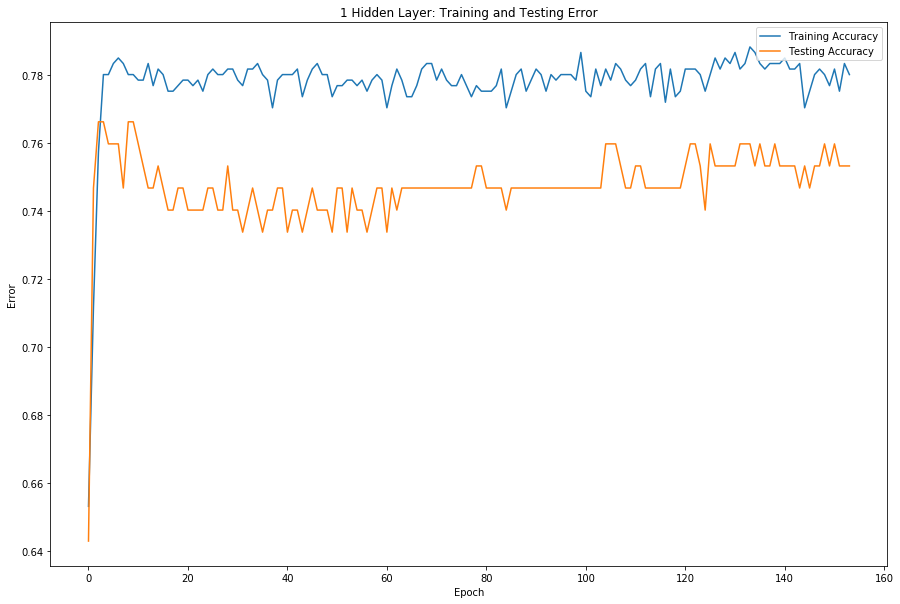

In [87]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('1 Hidden Layer: Training and Testing Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()


### Train vs Validation Loss

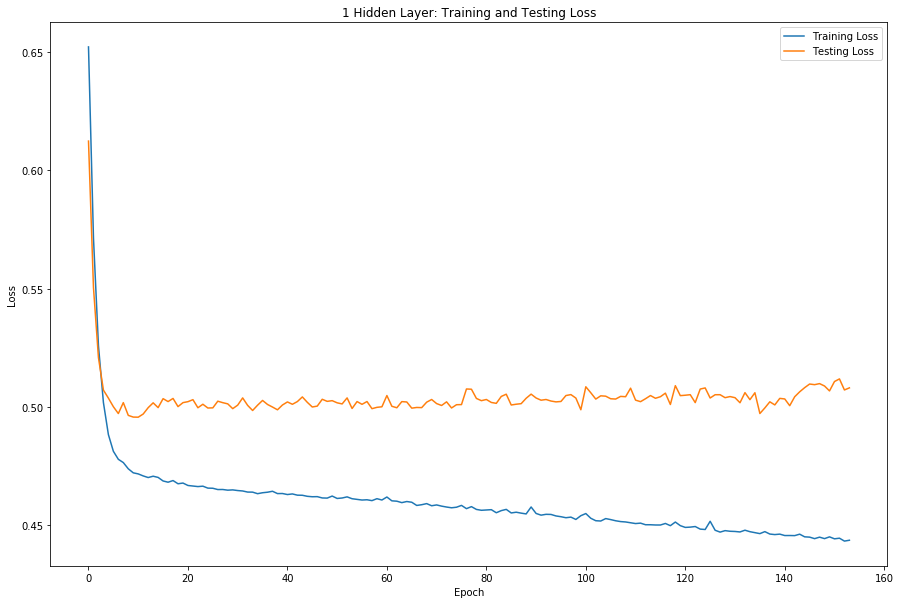

In [88]:
# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('1 Hidden Layer: Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()

# Part 2: Implementing a Neural Network with Three Hidden Layers

# Creating the model.
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=4)) # Hidden Layer 1
model.add(Dense(256, activation='relu')) # Hidden Layer 2
model.add(Dense(128, activation='relu')) # Hidden Layer 3
model.add(Dense(2, activation='sigmoid')) # Output Layer
visualizer(model, format='png', view=True)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
history = model.fit(Xtrain, to_categorical(Ytrain),
                    validation_data=(Xtest, to_categorical(Ytest)), epochs=20, batch_size=64)

# Evaluating the model
loss, accuracy = model.evaluate(Xtest, to_categorical(Ytest))
print('\n\n Loss', loss, 'Accuracy:', accuracy)

## Plotting the graphs 

### Train vs Validation Accuracy

# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('3 Hidden Layers: Training and Testing Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()



### Train vs Validation Loss

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('3 Hidden Layers: Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()